# Data inputs and Display Libraries



In [1]:
import pandas as pd
import numpy as np
import pickle

pd.set_option('display.float_format', lambda x: '%.5f' % x)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'


# Data Preprocessing Libraries

In [2]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder

# Feature Selection & Modelling Libraries

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.tree import DecisionTreeClassifier
import pickle
from sklearn.model_selection import GridSearchCV

# Metrics Libraries

In [4]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import f1_score
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

### Model Building

In [5]:
from sklearn import tree

In [6]:
# Acessing the data
!wget "https://github.com/univai-ghf/ghfmedia/raw/main/data/Trees_and_Ensembles/datasets.rar" 

--2022-03-17 04:12:36--  https://github.com/univai-ghf/ghfmedia/raw/main/data/Trees_and_Ensembles/datasets.rar
Resolving github.com (github.com)... 52.69.186.44
Connecting to github.com (github.com)|52.69.186.44|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/univai-ghf/ghfmedia/main/data/Trees_and_Ensembles/datasets.rar [following]
--2022-03-17 04:12:37--  https://raw.githubusercontent.com/univai-ghf/ghfmedia/main/data/Trees_and_Ensembles/datasets.rar
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3508143 (3.3M) [application/octet-stream]
Saving to: ‘datasets.rar’

datasets.rar        100%[===================>]   3.34M  --.-KB/s    in 0.08s   

2022-03-17 04:12:37 (40.9 MB/s) - ‘datasets.rar’

In [7]:
# Extracting the dataset
!mkdir './datasets'
!unrar e './datasets.rar' 'datasets'



UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from ./datasets.rar

Extracting  datasets/y_train1                                              0%  OK 
Extracting  datasets/df_all_test2                                          1%  2%  3%  4%  5%  6%  7%  8%  9% 10% 11% 12% 13% 14% 15% 16% 17% 18% 19% 20% 21% 22% 23% 24% 25% 26% 27% 28% 29% 30% 31% 32% 33%  OK 
Extracting  datasets/df_all_train2                                        34% 35% 36% 37% 38% 39% 40% 41% 42% 43% 44% 45% 46% 47% 48% 49% 50% 51% 52% 53% 54% 55% 56% 57% 58% 59% 60% 61% 62% 63% 64% 65% 66% 67% 68% 69% 70% 71% 72% 73% 74% 75% 76% 77% 78% 79% 80% 81%

In [8]:
fl_out = "./datasets"
def pick_in(obj_name):
    fl_out1 = fl_out + "/" + obj_name
    pickle_in = open(fl_out1,"rb")
    mod1= pickle.load(pickle_in)
    
    return mod1

In [9]:
list_objs = ["df_all_train2","y_train1","df_all_test2","y_test1","sel_cols"]

for i in list_objs:
     globals()[i]= pick_in(i)

In [ ]:
###run till here (3 mins)

In [10]:
df_all_train2.shape

(187600, 245)

In [11]:
df_all_train2[0:10,-6:].astype('int')

array([[      1, 7175181,      27,       3,       3,      10],
       [      0, 7601827,      30,       5,       5,      12],
       [      0, 9483434,      26,       2,       2,      14],
       [      0, 3211177,      30,       3,       3,      10],
       [      0, 8211851,      25,       2,       2,      10],
       [      0, 8737618,      25,       0,       0,      10],
       [      0, 6109577,      26,       1,       1,      10],
       [      0, 3354152,      26,       6,       6,      12],
       [      1, 5471719,      26,       2,       2,      10],
       [      0, 8243953,      28,       1,       1,      14]])

# Building Model

# Measure

In [12]:
def auc1_scr(mod1,test_set,actual1):
    mod = eval(mod1)
    pred1=mod.predict_proba(test_set)[:,1]
    fpr, tpr, thresholds = roc_curve(actual1, pred1)
    auc1 = auc(fpr, tpr)
    
    return auc1

In [ ]:
####Single Decision Tree

In [13]:
DT = DecisionTreeClassifier(random_state=0,max_depth=2)
DT.fit(df_all_train2,y_train1)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [14]:
auc1_te = auc1_scr("DT",df_all_test2,y_test1)
auc1_tr = auc1_scr("DT",df_all_train2,y_train1)

In [15]:
auc1_te,auc1_tr

(0.5269550745170777, 0.5269921464088778)

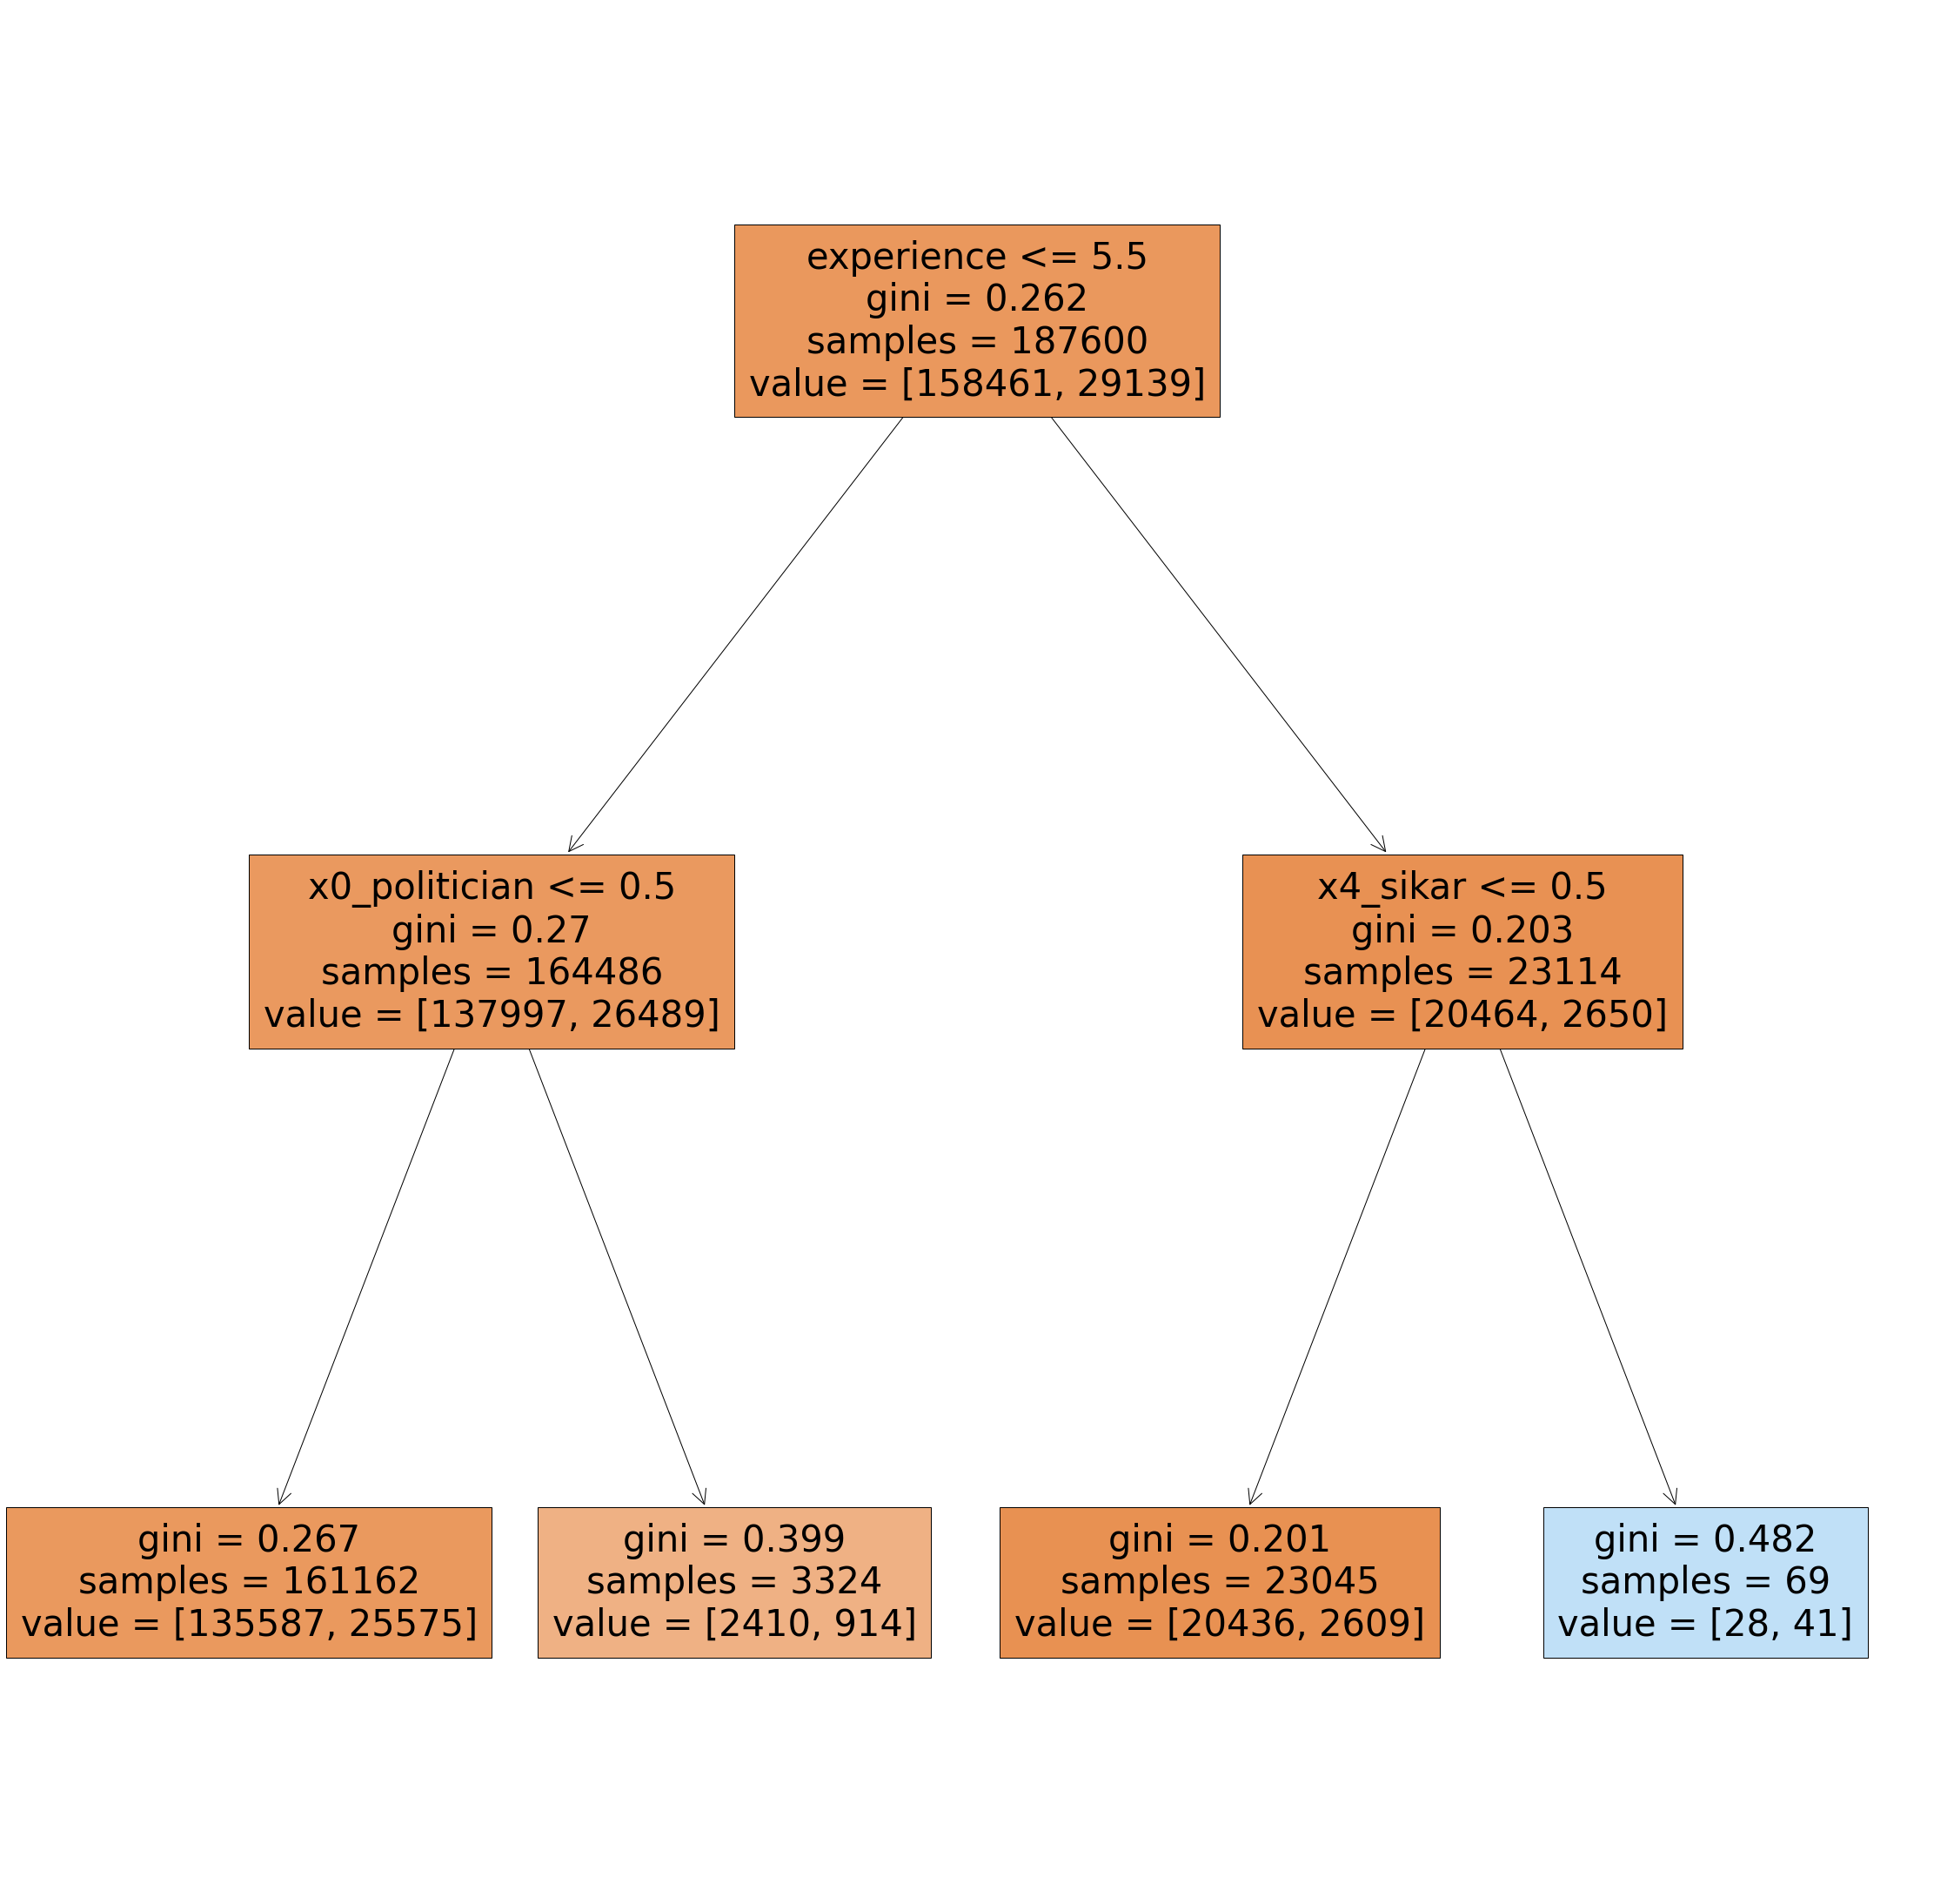

In [16]:
fig = plt.figure(figsize=(40,40))
_=tree.plot_tree(DT,feature_names=sel_cols,  
                   
                   filled=True,max_depth=3)

fig.savefig("decistion_tree.png")

In [17]:
auc1_te = auc1_scr("DT",df_all_test2,y_test1)
auc1_tr = auc1_scr("DT",df_all_train2,y_train1)

In [18]:
auc1_te,auc1_tr

(0.5269550745170777, 0.5269921464088778)

In [ ]:
####Back to presentation

In [ ]:
###Exercises
# Make Decision Tree Classifier with random state=0, max_depth=50 & max_depth=100
# Do you observe any significant changes in the train and test auc score ?
# How will you justify these changes

In [ ]:
# Your code here
DT_5 = DecisionTreeClassifier(__________)
DT_5.fit(_____________)

auc1_te = auc1_scr(___________)
auc1_tr = auc1_scr(____________)

print(________________________)

In [ ]:
# Now try to make a Decision Tree Classifier with max_depth =100
# compare the results with the earlier one and try to explain the reson for the changes
# Your code here





In [ ]:
##back to slide

In [19]:
dt_grid= DecisionTreeClassifier(random_state=42)

params = {
    'max_depth': [2, 3,5],
    'min_samples_leaf': [20, 50, 100],
    'criterion': ["gini", "entropy"]
}

grid_search = GridSearchCV(estimator=dt_grid, 
                           param_grid=params, 
                           cv=2, n_jobs=-1, verbose=1, scoring = "accuracy")


grid_search.fit(df_all_train2,y_train1)


Fitting 2 folds for each of 18 candidates, totalling 36 fits


GridSearchCV(cv=2, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5],
                         'min_samples_leaf': [20, 50, 100]},
             scoring='accuracy', verbose=1)

In [20]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,1.47790,0.01559,0.09029,0.00766,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.84468,0.84467,0.84467,0.00001,9
1,1.31501,0.02676,0.08730,0.00907,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.84468,0.84467,0.84467,0.00001,9
2,1.30004,0.00489,0.08531,0.00334,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.84468,0.84467,0.84467,0.00001,9
3,1.78872,0.01604,0.08585,0.00391,gini,3,20,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.84468,0.84489,0.84479,0.00011,7
4,2.01311,0.13395,0.09206,0.00393,gini,3,50,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.84468,0.84467,0.84467,0.00001,9


In [21]:
score_df.sort_values(["rank_test_score"]).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
15,2.61258,0.00734,0.10441,0.00722,entropy,5,20,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.84592,0.84538,0.84565,0.00027,1
6,2.66343,0.05736,0.08891,0.00860,gini,5,20,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.84568,0.84557,0.84562,0.00006,2
8,2.62048,0.02355,0.08721,0.00388,gini,5,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.84523,0.84511,0.84517,0.00006,3
16,2.65168,0.01243,0.08944,0.00469,entropy,5,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.84500,0.84527,0.84513,0.00013,4
17,2.60572,0.01449,0.07086,0.01614,entropy,5,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.84511,0.84510,0.84510,0.00001,5


In [22]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=20,
                       random_state=42)